# Extract L-matrix from xs covariance matrix 

In [1]:
import sandy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
err = 1  # xs reconstruction tolerance, very poor for fast results
mt = [2, 4, 18, 102]  # considered reactions

# ERRORR parameters
ek = [2e-5, 5.4e-1, 2.26033e1, 2.03468e3, 6.73795e4, 4.97871e5, 2.23130e6, 1.96403e7]  # energy groups in eV
iwt = 2  # constant

## Plot L-matrix for correlated reactions (Pu-239)

In [4]:
tape = sandy.get_endf6_file("jeff_33", "xs", 942390)
errorr = tape.get_errorr(
    err=err,
    errorr33_kws=dict(
        ek=ek,
        iwt=iwt,
        mt=mt,
    ),
    mubar=False, chi=False, nubar=False,  # keep only xs
)
C = errorr["errorr33"].get_cov()

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    



 njoy 2016.74  12Jan24                                       02/09/24 15:25:34
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.1s

 ---message from rdf2bw---calculation of angular distribution not installed.



 moder...                                                                 2.4s



 errorr...                                                                2.8s

 processing mat  9437
 ---------------------
  94-Pu-239 IRSN-CEA   EVAL-FEV16 IRSN-CEA DAM/DEN COLLAB.           

 covariances calculated for  4 reactions and   33 groups                  2.8s
                                                                          2.8s
 *****************************************************************************


In [5]:
tolerance = 0  # truncate eigenvalues < 0 if any is found
L = C.get_L(tolerance=tolerance)

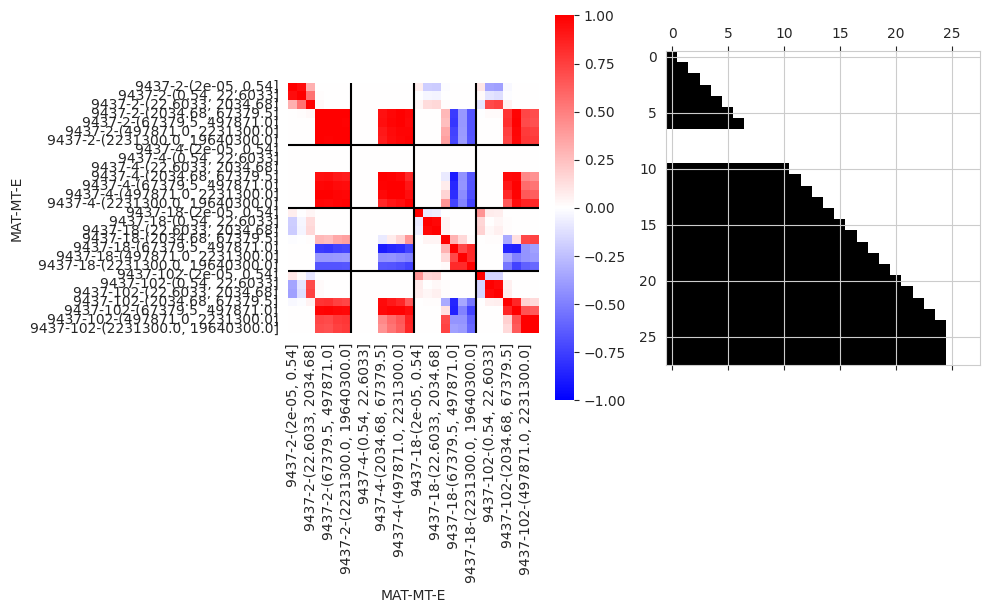

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), dpi=100)

ax = axs[0]
ax.set_aspect("equal")
sns.heatmap(C.get_corr().data, vmin=-1, vmax=1, cmap="bwr", ax=ax)
ax.axhline(7, color='k')
ax.axvline(7, color='k')
ax.axhline(7 * 2, color='k')
ax.axvline(7 * 2, color='k')
ax.axhline(7 * 3, color='k')
ax.axvline(7 * 3, color='k')

ax = axs[1]
ax.set_aspect("equal")
ax.spy(L)

fig.tight_layout();

## Plot L-matrix for uncorrelated reactions (Pu-241)

In [7]:
tape = sandy.get_endf6_file("jeff_33", "xs", 942410)
errorr = tape.get_errorr(
    err=err,
    errorr33_kws=dict(
        ek=ek,
        iwt=iwt,
        mt=mt,
    ),
    mubar=False, chi=False, nubar=False,  # keep only xs
)
C = errorr["errorr33"].get_cov()

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    



 njoy 2016.74  12Jan24                                       02/09/24 15:25:39
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.1s

 moder...                                                                 0.1s

 errorr...                                                                0.2s

 processing mat  9443
 ---------------------
  94-Pu-241 JAEA+      EVAL-JAN10 O.Iwamoto,N.Otuka,S.Chiba,+        



 covariances calculated for  4 reactions and   94 groups                  0.2s
                                                                          0.2s
 *****************************************************************************


In [8]:
tolerance = 0  # truncate eigenvalues < 0 if any is found
L = C.get_L(tolerance=tolerance)

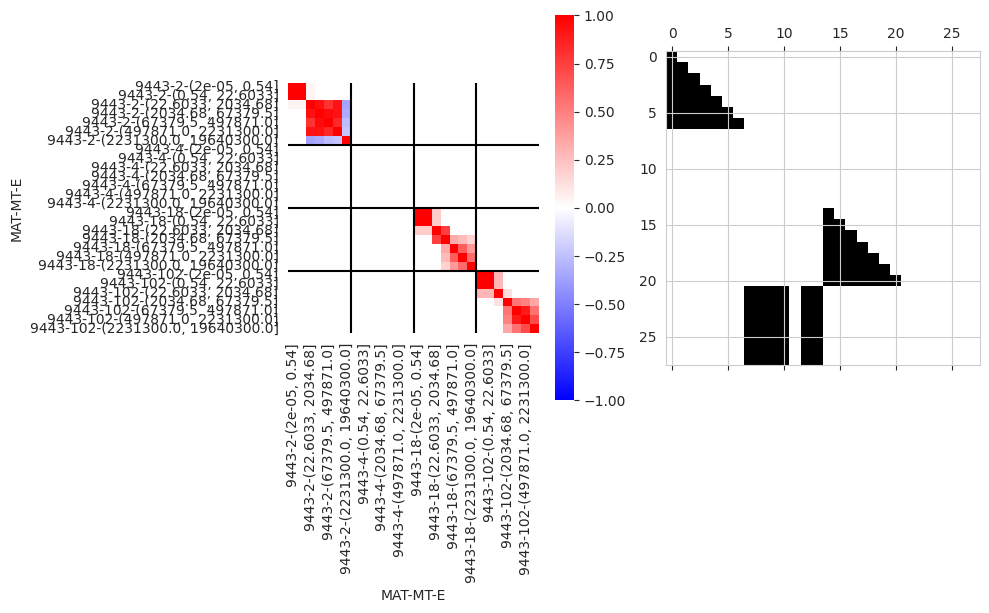

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), dpi=100)

ax = axs[0]
ax.set_aspect("equal")
sns.heatmap(C.get_corr().data, vmin=-1, vmax=1, cmap="bwr", ax=ax)
ax.axhline(7, color='k')
ax.axvline(7, color='k')
ax.axhline(7 * 2, color='k')
ax.axvline(7 * 2, color='k')
ax.axhline(7 * 3, color='k')
ax.axvline(7 * 3, color='k')

ax = axs[1]
ax.set_aspect("equal")
ax.spy(L)

fig.tight_layout();